In [2]:
import os
import pandas as pd
from PIL import Image
import numpy as np
import torch
from torch.utils.data import DataLoader, Dataset
import torchvision.transforms as transforms
import torch.nn.functional as F
from torch import nn
import matplotlib.pyplot as plt
from tqdm import tqdm
from PIL import Image
import os
from einops import rearrange, repeat
import einops
from glob import glob
from math import log
import math
from tqdm import tqdm
import pickle
import matplotlib.pyplot as plt
import nibabel as nib
import nilearn as nil

In [31]:
###- DS LOCATION CONFIRMATION -###

jubin_ds = "/home/idies/workspace/Temporary/ecardillo/scratch/jubin-ds.nii"

###- verify the file exists -###
if os.path.exists(jubin_ds):
    print(f"YES! File found at: {jubin_ds}")
else:
    print(f"Error: File not found at: {jubin_ds}")

fmri = nib.load(jubin_ds)

YES! File found at: /home/idies/workspace/Temporary/ecardillo/scratch/jubin-ds.nii


In [32]:
###- DS METADATA -###

print("=" * 80)
print(f"Shape: {fmri.get_fdata().shape}")
print(f"Affine Transformation:\n {fmri.affine}")
print(f"Header information:\n{fmri.header}")
num_slices = fmri.shape[-1]
print(f"Number of slices: {num_slices}")
print("=" * 80)

Shape: (91, 109, 91, 1200)
Affine Transformation:
 [[  -2.    0.    0.   90.]
 [   0.    2.    0. -126.]
 [   0.    0.    2.  -72.]
 [   0.    0.    0.    1.]]
Header information:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : np.bytes_(b'')
db_name         : np.bytes_(b'')
extents         : 0
session_error   : 0
regular         : np.bytes_(b'r')
dim_info        : 0
dim             : [   4   91  109   91 1200    1    1    1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [-1.    2.    2.    2.    0.72  0.    0.    0.  ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : np.bytes_(b'FSL5.0

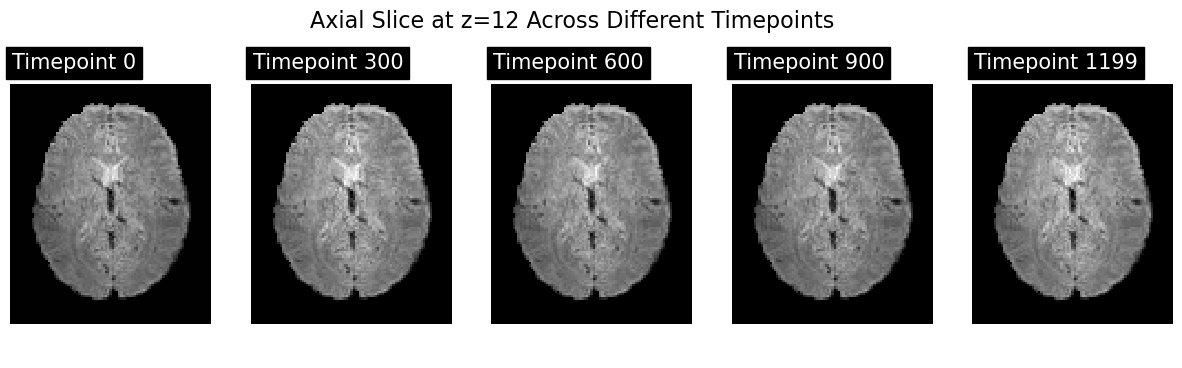

In [5]:
###- GET FRAMES AT VARIOUS TIMEPOINTS -###

import nilearn.plotting
import nilearn.image
import numpy as np
import matplotlib.pyplot as plt
import nibabel as nib

timepoints_to_display = [0, 300, 600, 900, 1199,]
z_coordinate = 12
# timepoints we want to display

fig, axes = plt.subplots(1, len(timepoints_to_display), figsize=(15, 4))
fig.suptitle(f'Axial Slice at z={z_coordinate} Across Different Timepoints', fontsize=16)
# determines what params will be used to display images

for i, t in enumerate(timepoints_to_display):
    volume_at_t = nilearn.image.index_img(fmri, t)
# iterates through timepoints and displays at each
    
    nilearn.plotting.plot_img(
        volume_at_t,
        display_mode='z',
        cut_coords=[z_coordinate],
        axes=axes[i],
        title=f'Timepoint {t}',
        annotate=False,
        draw_cross=False,
        colorbar=False
    )
# attributes of images

plt.show()

Displaying axial slice at z=12 for timepoint 700


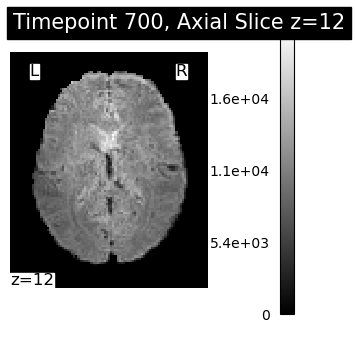

In [33]:
###- GET FRAME AT SINGLE TIMEPOINT (LABELED) -###

import nilearn.plotting
import nilearn.image
import matplotlib.pyplot as plt

labeled_output_dir = 'labeled-single'

labeled_timepoint = 700  # You can change this to any frame from 0 to 1199
z_coordinate = 12
# set the timepoint and depth we want

output_filename = f"timepoint_{labeled_timepoint}_z_{z_coordinate}.jpg"
output_path = os.path.join(labeled_output_dir, output_filename)

single_volume = nilearn.image.index_img(fmri, labeled_timepoint)
# retrives the volume at our selected timepoint 

print(f"Displaying labeled axial slice at z={z_coordinate} for timepoint {timepoint_to_display}")
labeled_display = nilearn.plotting.plot_img(
    single_volume,
    display_mode='z',
    cut_coords=[z_coordinate],
    title=f'Timepoint {timepoint_to_display}, Axial Slice z={z_coordinate}',
    colorbar=True, # adds a colorbar
    draw_cross=False
)

plt.show()

In [34]:
###- SAVE LABELED FRAME -###

from datetime import datetime

output_dir = 'labeled-single'
os.makedirs(output_dir, exist_ok=True)
# creates a new dir to store single timepoint slices

current_datetime = datetime.now()

output_filename = f"timepoint_{timepoint_to_display}_z_{z_coordinate}_at_{current_datetime}.jpg"
output_path = os.path.join(output_dir, output_filename)
# names file by slice and adds it to new dir 

print(f"Saving plot to: {output_path}")
display.savefig(output_path)
# saves to new dir

display.close()

Saving plot to: labeled-single/timepoint_700_z_12_at_2025-07-09 20:27:58.363378.jpg


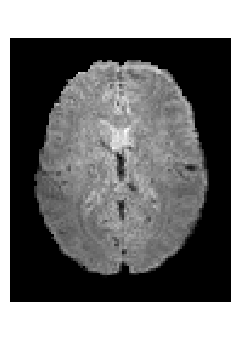

In [39]:
###- GET CLEAN FRAME AT SINGLE TIMEPOINT (NO LABELS) -###

import nilearn.plotting
import nilearn.image
import matplotlib.pyplot as plt

output_dir = 'clean-single'

timepoint_to_display = 90
z_coordinate = 12

single_volume = nilearn.image.index_img(fmri, clean_timepoint_to_display)

clean_display = nilearn.plotting.plot_img(
    single_volume,
    display_mode='z',
    cut_coords=[z_coordinate],
    title=None,          # Remove title
    colorbar=False,      # Remove colorbar
    annotate=False,      # Remove coordinate annotations and cross
    draw_cross=False
)

plt.show()

In [40]:
###- SAVE ClEAN (NO LABEL) FRAME -###

from datetime import datetime

output_dir = 'clean-single'
os.makedirs(output_dir, exist_ok=True)
# creates a new dir to store single timepoint slices

current_datetime = datetime.now()

output_filename = f"CLEAN_timepoint_{timepoint_to_display}_z_{z_coordinate}_at_{current_datetime}.jpg"
output_path = os.path.join(output_dir, output_filename)
# names file by slice and adds it to new dir 

print(f"Saving plot to: {output_path}")
clean_display.savefig(output_path)
# saves to new dir

clean_display.close()

Saving plot to: clean-single/CLEAN_timepoint_90_z_12_at_2025-07-09 20:40:18.810972.jpg


In [38]:
import nilearn.image
import numpy as np
import pandas as pd

# --- Part 1: Extract the clean 2D data array ---

# 1. Define the timepoint and z-coordinate
timepoint_to_display = 100
z_coordinate = 12

# 2. Select the 3D volume for the chosen timepoint
single_volume = nilearn.image.index_img(fmri, timepoint_to_display)

# 3. Get the raw 3D data array from the Nifti object
# .get_fdata() is the key function to get the numerical data
volume_data_3d = single_volume.get_fdata()

# 4. Slice the 3D array to get the specific 2D axial slice
# For axial slices, we slice along the last axis (axis 2)
bw_array = volume_data_3d[:, :, z_coordinate]

# Now, 'bw_array' is a clean 2D NumPy array containing only the intensity values
# for that specific slice, ready to be used in your script.
print(f"Shape of the extracted 2D slice: {bw_array.shape}")


# --- Part 2: Your code to build the IMG DataFrame ---
# The 'bw_array' from above is now used here.

height, width = bw_array.shape[:2]

# build coordinate grids
x_coords, y_coords = np.meshgrid(np.arange(width), np.arange(height))

# flatten everything and create df
x_flat = x_coords.ravel()
y_flat = y_coords.ravel()
intensity_flat = bw_array.ravel()

# since our image is BW, we use intensity instead of rgb
max_intensity = np.max(intensity_flat)

if max_intensity == 0:
    # If all pixels are 0, normalized intensity will also be 0
    normalized_intensity = intensity_flat
else:
    # Normalize intensity to be between 0 and 1
    normalized_intensity = intensity_flat / max_intensity


# Corrected the DataFrame creation
df = pd.DataFrame({
    "x_pos": x_flat / (width - 1),
    "y_pos": y_flat / (height - 1),
    "intensity": normalized_intensity  # Added the column name "intensity"
})

print('\ndf head:')
print(df.head())

print('\ndf info:')
df.info()

Shape of the extracted 2D slice: (91, 109)

df head:
      x_pos  y_pos  intensity
0  0.000000    0.0        0.0
1  0.009259    0.0        0.0
2  0.018519    0.0        0.0
3  0.027778    0.0        0.0
4  0.037037    0.0        0.0

df info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9919 entries, 0 to 9918
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   x_pos      9919 non-null   float64
 1   y_pos      9919 non-null   float64
 2   intensity  9919 non-null   float64
dtypes: float64(3)
memory usage: 232.6 KB
